# Neighbourhood Watch Victoria survey analysis

In [1]:
#!pip install geopandas

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [3]:
#Read the data
df = pd.read_csv("Copy of HSIMP VIC Quiz Results 030620_2.csv",sep =',')
df.head()

Name Postcode  \
0  Mr. Bilbo L. Baggins Ring-bearer      NaN   
1                             James     3199   
2                             James     3199   
3                              Nick     3189   
4                             wilma     3085   

   How safe do you feel when you are in your home?  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

  What type of home do you live in?  \
0                               NaN   
1                             House   
2                             House   
3                             House   
4                             House   

  Which of the following external doors does your home have?  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                                NaN           
4                                                NaN           

               How well do you know your neighbours?  \
0                                                NaN   
1  I know them very well and leave a spare key wi...   
2  I know them very well and leave a spare key wi...   
3  I know them to say hello and we talk occasiona...   
4  I know them fairly well, we keep an eye on eac...   

  Keys stored out of sight in a secret spot.  \
0                                        NaN   
1                                        NaN   
2                                        Yes   
3                                        Yes   
4                                        Yes   

  Spare keys not hidden in obvious places outside the home  \
0                                                NaN         
1                                                NaN         
2                                                Yes         
3                                                Yes         
4                                                Yes         

  Keys not kept in locks when not at home  \
0                                     NaN   
1                                     NaN   
2                                     Yes   
3                                     Yes   
4                                     Yes   

  Spare key kept with trusted friend, relative or neighbour ...   \
0                                                NaN        ...    
1                                                NaN        ...    
2                                                NaN        ...    
3                                                NaN        ...    
4                                                NaN        ...    

  Motion sensor or timed lighting Neighbourhood Watch stickers visible  \
0                             NaN                                  NaN   
1                             NaN                                  NaN   
2                             Yes                                  Yes   
3                             Yes                                  Yes   
4                             Yes                                  Yes   

  What fences does your property have?  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

  Which of the following security measures do you have in place for your front fence and gate  \
0                                                NaN                                            
1                                                NaN                                            
2                                                NaN                                            
3                               

### Data Preprocessing

In [4]:
#Drop unneccesary columns
df = df.drop(['Name', 'Date'], axis = 1) 

In [5]:
#Check unique values
for col in df:
    print('Unique values of ' + col)
    print(df[col].unique())

Unique values of Postcode
[nan '3199' '3189' '3085' '3079' '3219' '3019' '3103' '3182' '3931' '3223'
 '3335' '3037' '3026' '3029' '3444' '3198' '3215' '3086' '3046' '3108'
 '3028' '3099' '3197' '3764' '3000' '3844' '66220' '2602' '6000' '3196'
 '3071' '3070' '3016' '3756' '3564' '3608' '3977' '3820' '3939' '3013'
 '3212' '3930' '3111' '3810' '3975' '3978' '3809' '3757' '3806' '3113'
 '3040' '2305' '2114' '3030' '3088' '3109' '3059' '3224' '3130' '3875'
 '3131' '3434' '2207' '3350' '3058' '3170' '3008' '3173' '3754' '3020'
 '3128' '3195' '2740' '19123' '3188' '3136' '3191' '3107' '820' '3336'
 '3074' '3915' '3358' '3148' '3840' '3105' '3204' '3149' '3158' '3174'
 '3031' '3083' '3976' '4814' '3804' '800' '3555' '3064' '3630' '3134'
 '3106' '3138' '3123' '6082' '3936' '3672' '3133' '3666' '3066' '3466'
 '3186' '3178' '3146' '3166' '3144' '3153' '3429' '6171' '3192' '3095'
 '3143' '3081' '3550' '3722' '3226' '3073' '3126' '3104' '3084' '3129'
 '3132' '3161' '3150' '3004' '3171' '3217' '313

In [6]:
#Replace NA
for col in df:
    print('\nAfter transformation')
    df[col] = df[col].fillna('No Response')
    print(df[col].unique())
    print('')


After transformation
['No Response' '3199' '3189' '3085' '3079' '3219' '3019' '3103' '3182'
 '3931' '3223' '3335' '3037' '3026' '3029' '3444' '3198' '3215' '3086'
 '3046' '3108' '3028' '3099' '3197' '3764' '3000' '3844' '66220' '2602'
 '6000' '3196' '3071' '3070' '3016' '3756' '3564' '3608' '3977' '3820'
 '3939' '3013' '3212' '3930' '3111' '3810' '3975' '3978' '3809' '3757'
 '3806' '3113' '3040' '2305' '2114' '3030' '3088' '3109' '3059' '3224'
 '3130' '3875' '3131' '3434' '2207' '3350' '3058' '3170' '3008' '3173'
 '3754' '3020' '3128' '3195' '2740' '19123' '3188' '3136' '3191' '3107'
 '820' '3336' '3074' '3915' '3358' '3148' '3840' '3105' '3204' '3149'
 '3158' '3174' '3031' '3083' '3976' '4814' '3804' '800' '3555' '3064'
 '3630' '3134' '3106' '3138' '3123' '6082' '3936' '3672' '3133' '3666'
 '3066' '3466' '3186' '3178' '3146' '3166' '3144' '3153' '3429' '6171'
 '3192' '3095' '3143' '3081' '3550' '3722' '3226' '3073' '3126' '3104'
 '3084' '3129' '3132' '3161' '3150' '3004' '3171' '3217

In [7]:
print('\nAfter transformation')
df['Postcode'] = df['Postcode'].replace({'Rooney': 0, 'mer': 0,'No Response': 0, 'Thorne':0, 'Grivas':0,'3084he': 3084})
print(df['Postcode'].unique())


After transformation
[0 '3199' '3189' '3085' '3079' '3219' '3019' '3103' '3182' '3931' '3223'
 '3335' '3037' '3026' '3029' '3444' '3198' '3215' '3086' '3046' '3108'
 '3028' '3099' '3197' '3764' '3000' '3844' '66220' '2602' '6000' '3196'
 '3071' '3070' '3016' '3756' '3564' '3608' '3977' '3820' '3939' '3013'
 '3212' '3930' '3111' '3810' '3975' '3978' '3809' '3757' '3806' '3113'
 '3040' '2305' '2114' '3030' '3088' '3109' '3059' '3224' '3130' '3875'
 '3131' '3434' '2207' '3350' '3058' '3170' '3008' '3173' '3754' '3020'
 '3128' '3195' '2740' '19123' '3188' '3136' '3191' '3107' '820' '3336'
 '3074' '3915' '3358' '3148' '3840' '3105' '3204' '3149' '3158' '3174'
 '3031' '3083' '3976' '4814' '3804' '800' '3555' '3064' '3630' '3134'
 '3106' '3138' '3123' '6082' '3936' '3672' '3133' '3666' '3066' '3466'
 '3186' '3178' '3146' '3166' '3144' '3153' '3429' '6171' '3192' '3095'
 '3143' '3081' '3550' '3722' '3226' '3073' '3126' '3104' '3084' '3129'
 '3132' '3161' '3150' '3004' '3171' '3217' '3137' '30

In [8]:
#Convert to numeric
df['Postcode'] = pd.to_numeric(df['Postcode'],errors='coerce')

In [9]:
#load suburb, lat long data
df1 = pd.read_csv("location.csv",sep =',')

In [10]:
df1.head()

Postcode          suburb state        lat         lon
0      3000       MELBOURNE   VIC -37.814563  144.970267
1      3001       MELBOURNE   VIC -38.365017  144.765920
2      3002  EAST MELBOURNE   VIC -37.816640  144.987811
3      3003  WEST MELBOURNE   VIC -37.806255  144.941123
4      3004       MELBOURNE   VIC -37.837324  144.976335

In [11]:
#Merge using postcode as key
u = df.assign(cnt=df.groupby('Postcode').cumcount())
v = df1.assign(cnt=df1.groupby('Postcode').cumcount())

In [12]:
v = v.drop_duplicates(subset='Postcode', keep='first')

In [13]:
print(v.shape)
v.head()

(746, 6)


Postcode          suburb state        lat         lon  cnt
0      3000       MELBOURNE   VIC -37.814563  144.970267    0
1      3001       MELBOURNE   VIC -38.365017  144.765920    0
2      3002  EAST MELBOURNE   VIC -37.816640  144.987811    0
3      3003  WEST MELBOURNE   VIC -37.806255  144.941123    0
4      3004       MELBOURNE   VIC -37.837324  144.976335    0

In [14]:
df_new = u.merge(v, on=['Postcode'], how='left')
print(df_new.shape)
df_new.head()

(1126, 44)


Postcode How safe do you feel when you are in your home?  \
0         0                                     No Response   
1      3199                                     No Response   
2      3199                                     No Response   
3      3189                                     No Response   
4      3085                                     No Response   

  What type of home do you live in?  \
0                       No Response   
1                             House   
2                             House   
3                             House   
4                             House   

  Which of the following external doors does your home have?  \
0                                        No Response           
1                                        No Response           
2                                        No Response           
3                                        No Response           
4                                        No Response           

               How well do you know your neighbours?  \
0                                        No Response   
1  I know them very well and leave a spare key wi...   
2  I know them very well and leave a spare key wi...   
3  I know them to say hello and we talk occasiona...   
4  I know them fairly well, we keep an eye on eac...   

  Keys stored out of sight in a secret spot.  \
0                                No Response   
1                                No Response   
2                                        Yes   
3                                        Yes   
4                                        Yes   

  Spare keys not hidden in obvious places outside the home  \
0                                        No Response         
1                                        No Response         
2                                                Yes         
3                                                Yes         
4                                                Yes         

  Keys not kept in locks when not at home  \
0                             No Response   
1                             No Response   
2                                     Yes   
3                                     Yes   
4                                     Yes   

  Spare key kept with trusted friend, relative or neighbour  \
0                                        No Response          
1                                        No Response          
2                                        No Response          
3                                        No Response          
4                                        No Response          

  Does your home have any security systems?  ...   \
0                               No Response  ...    
1                               No Response  ...    
2                                       Yes  ...    
3                                       Yes  ...    
4                                       Yes  ...    

  Do you have any outdoor buildings such as sheds, a studio or granny flat?  \
0                                        No Response                          
1                                        No Response                          
2                                        No Response                          
3                                        No Response                          
4                                        No Response                          

  Which of these security measures do you have on your outdoor buildings  \
0                                        No Response                       
1                                        No Response                       
2                                        No Response                       
3                                        No Response                       
4                                        No Response                       

  Does your home have an enclosed garage?  \
0                             No Response   
1             

In [15]:
df_new.isnull().sum()

Postcode                                                                                                   0
How safe do you feel when you are in your home?                                                            0
What type of home do you live in?                                                                          0
Which of the following external doors does your home have?                                                 0
How well do you know your neighbours?                                                                      0
Keys stored out of sight in a secret spot.                                                                 0
Spare keys not hidden in obvious places outside the home                                                   0
Keys not kept in locks when not at home                                                                    0
Spare key kept with trusted friend, relative or neighbour                                                  0
Does your home have

In [16]:
#!pip install descartes

### Load shape file of Victoria

In [17]:
nb = 'VIC_LOCALITY_POLYGON_shp.shp'
regions = gpd.read_file(nb)
regions.head()

LC_PLY_PID   DT_CREATE DT_RETIRE  LOC_PID  VIC_LOCALI VIC_LOCA_1 VIC_LOCA_2  \
0       6670  2011-08-31      None  VIC2615  2012-04-27       None  UNDERBOOL   
1       6671  2011-08-31      None  VIC1986  2012-04-27       None     NURRAN   
2       6672  2011-08-31      None  VIC2862  2012-04-27       None   WOORNDOO   
3       6673  2011-08-31      None   VIC734  2018-08-03       None   DEPTFORD   
4       6674  2011-08-31      None  VIC2900  2012-04-27       None      YANAC   

  VIC_LOCA_3 VIC_LOCA_4 VIC_LOCA_5 VIC_LOCA_6 VIC_LOCA_7  \
0       None       None          G       None          2   
1       None       None          G       None          2   
2       None       None          G       None          2   
3       None       None          G       None          2   
4       None       None          G       None          2   

                                            geometry  
0  POLYGON ((141.74552399 -35.07228701, 141.74552...  
1  POLYGON ((148.668767 -37.39571245, 148.6687620...  
2  POLYGON ((142.92287999 -37.97885997, 142.90449...  
3  POLYGON ((147.82335712 -37.66000897, 147.82312...  
4  POLYGON ((141.279783 -35.99858911, 141.2798853...

In [18]:
regions.rename(columns={'VIC_LOCA_2': 'suburb'}, inplace=True)

In [19]:
regions.head()

LC_PLY_PID   DT_CREATE DT_RETIRE  LOC_PID  VIC_LOCALI VIC_LOCA_1     suburb  \
0       6670  2011-08-31      None  VIC2615  2012-04-27       None  UNDERBOOL   
1       6671  2011-08-31      None  VIC1986  2012-04-27       None     NURRAN   
2       6672  2011-08-31      None  VIC2862  2012-04-27       None   WOORNDOO   
3       6673  2011-08-31      None   VIC734  2018-08-03       None   DEPTFORD   
4       6674  2011-08-31      None  VIC2900  2012-04-27       None      YANAC   

  VIC_LOCA_3 VIC_LOCA_4 VIC_LOCA_5 VIC_LOCA_6 VIC_LOCA_7  \
0       None       None          G       None          2   
1       None       None          G       None          2   
2       None       None          G       None          2   
3       None       None          G       None          2   
4       None       None          G       None          2   

                                            geometry  
0  POLYGON ((141.74552399 -35.07228701, 141.74552...  
1  POLYGON ((148.668767 -37.39571245, 148.6687620...  
2  POLYGON ((142.92287999 -37.97885997, 142.90449...  
3  POLYGON ((147.82335712 -37.66000897, 147.82312...  
4  POLYGON ((141.279783 -35.99858911, 141.2798853...

In [20]:
regions.shape

(2973, 13)

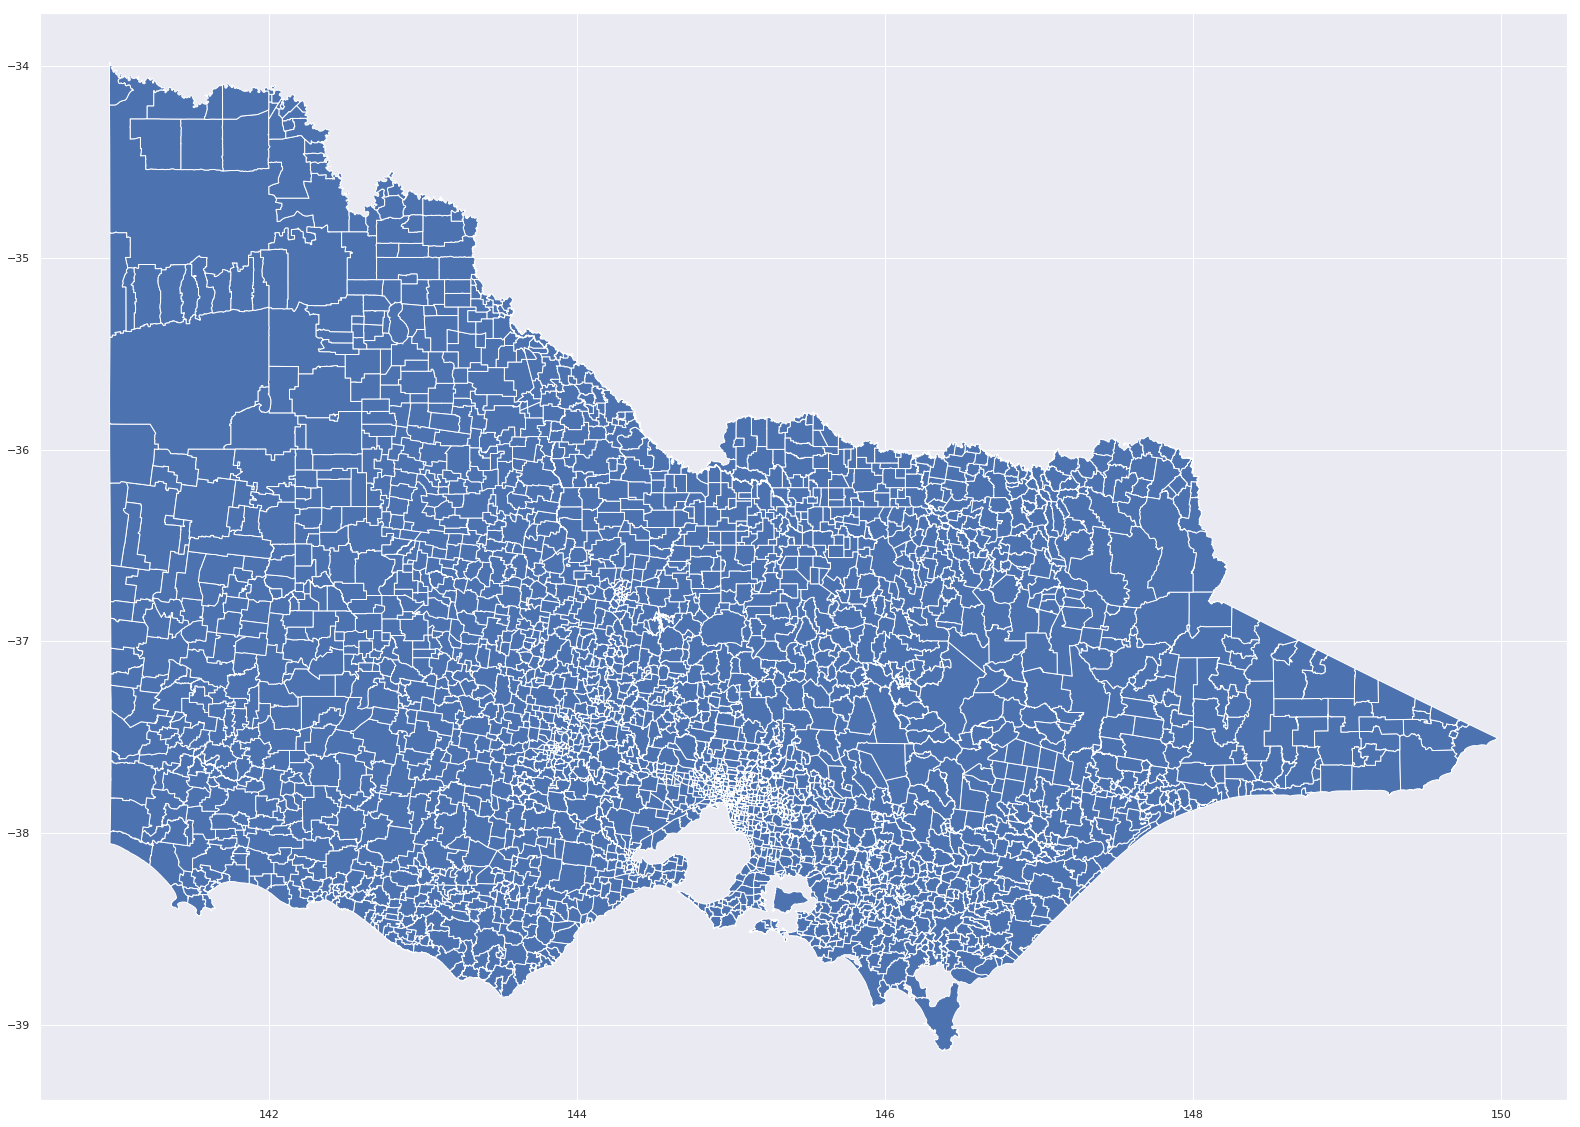

In [21]:
#Load Victoria map
regions.plot(figsize=(40,20))
plt.show()

In [22]:
suburb = df_new.loc[:,'suburb']
rating = df_new.loc[:,'How safe do you feel when you are in your home?']
suburb = pd.DataFrame({'suburb': suburb,'rating':rating})
suburb['suburb'] = suburb['suburb'].str.lower()
regions['suburb'] =regions['suburb'].str.lower()

In [23]:
# Join the dataset with the available mapping files.
# We will fill in the neighbourhoods which were not present in the dataset with 0.
# this way we will still see the neighbourhood in the map, but no housing will be shown on it.
merged = regions.set_index('suburb').join(suburb.set_index('suburb'))
merged = merged.reset_index()
merged = merged.fillna(0)
merged[['suburb', 'geometry', 'rating']].head()

suburb                                           geometry rating
0    abbeyard  POLYGON ((146.6725295 -36.99902764, 146.672528...      6
1  abbotsford  POLYGON ((144.99137102 -37.809605, 144.992539 ...      8
2  aberfeldie  POLYGON ((144.89829839 -37.76465028, 144.89789...      8
3  aberfeldie  POLYGON ((144.89829839 -37.76465028, 144.89789...      8
4  aberfeldie  POLYGON ((144.89829839 -37.76465028, 144.89789...      6

In [24]:
merged['rating'] = pd.to_numeric(merged['rating'],errors='coerce')

## Overall safety ratings across Victoria

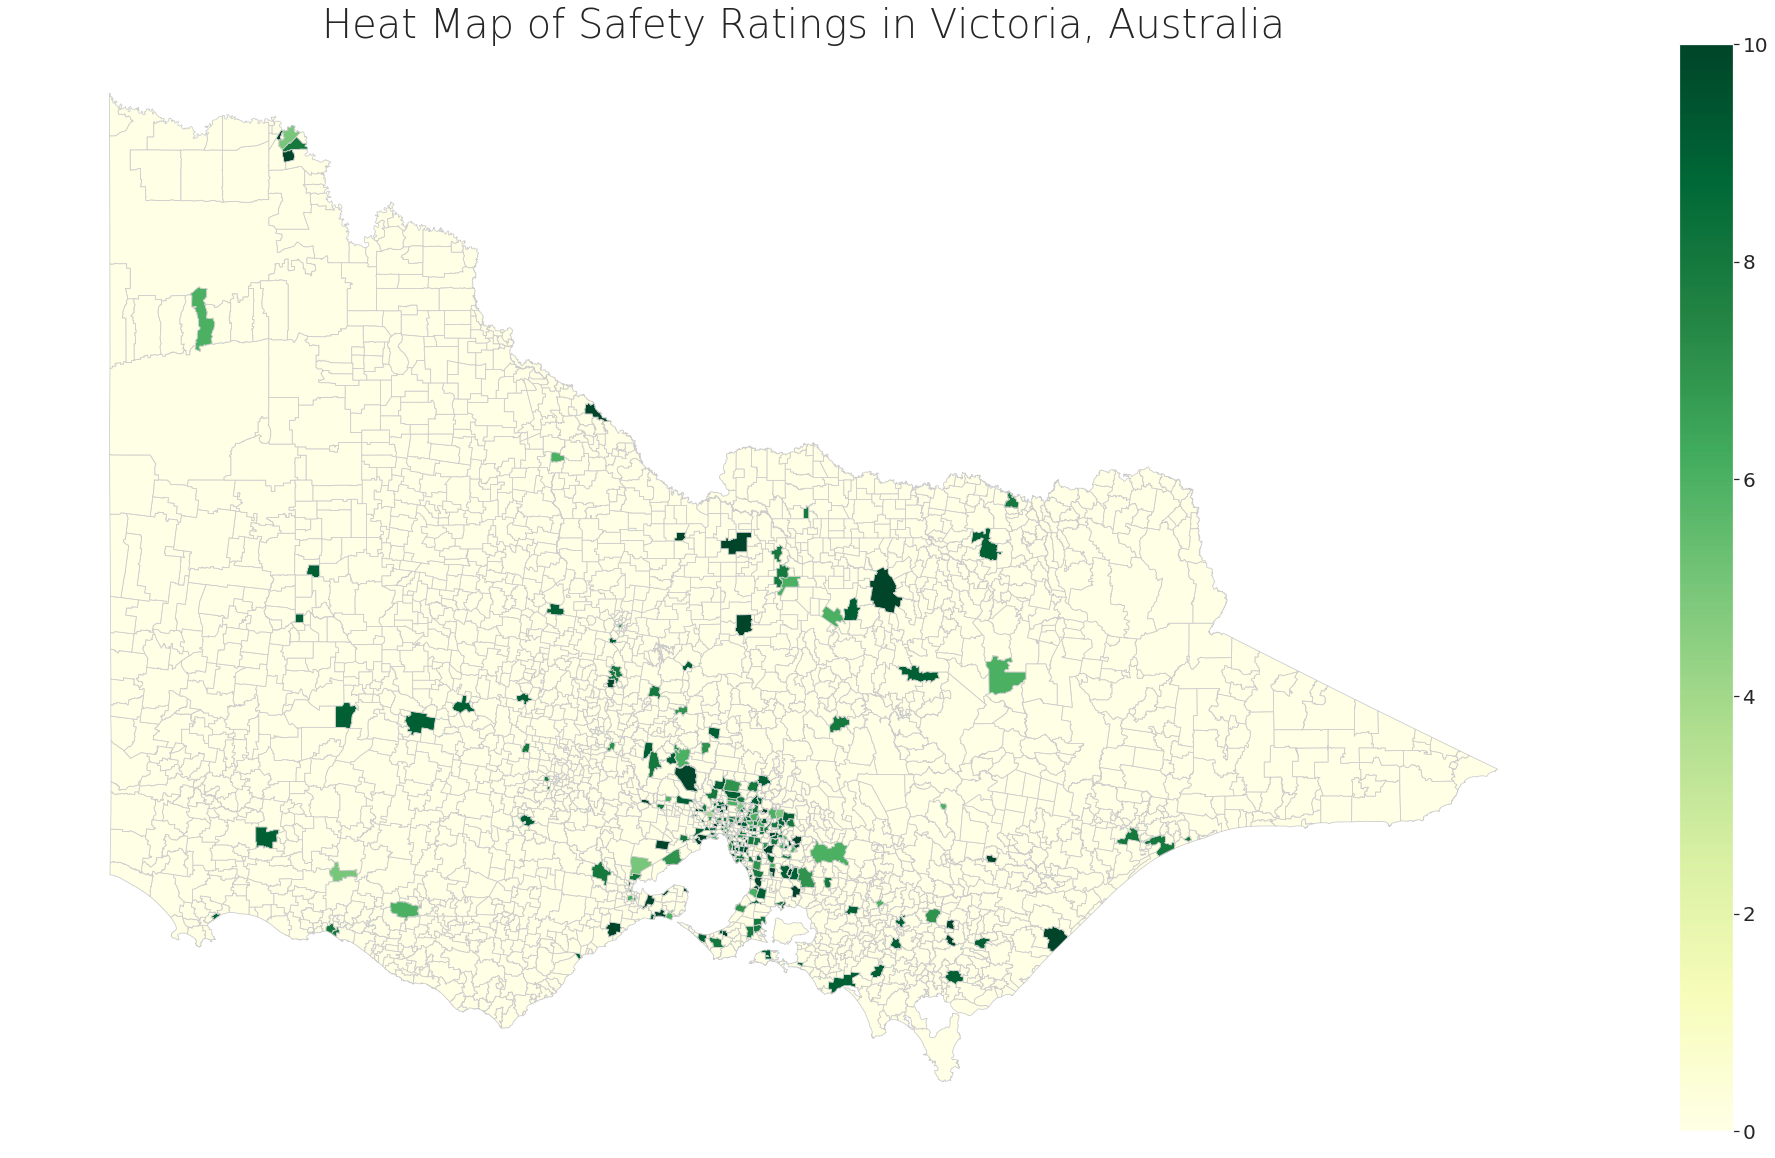

In [25]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Safety Ratings in Victoria, Australia', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'YlGn'
vmin, vmax = 0, 10
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

# actually plot the map
# we will only annotate the plot for neighbourhoods with more than 50 houses sold
merged.plot('rating', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in merged.iterrows():
    if(row['rating'] > 50):
        plt.annotate(text=row['suburb'], xy=(row['geometry'], row['geometry']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
plt.show()
fig.savefig('plot1.pdf')

## Safest suburbs with safety rating of 10

In [26]:
merged_copy = merged.copy()

In [27]:
print('\nAfter transformation')
merged_copy['rating'] = merged_copy['rating'].replace({1.0: 0, 2.0:0, 3.0:0,4.0:0,5.0:0,6.0:0, 7.0:0, 8.0:0,9.0:0})
print(merged_copy['rating'].unique())
print('')


After transformation
[ 0. 10. nan]



In [28]:
merged.shape

(3677, 14)

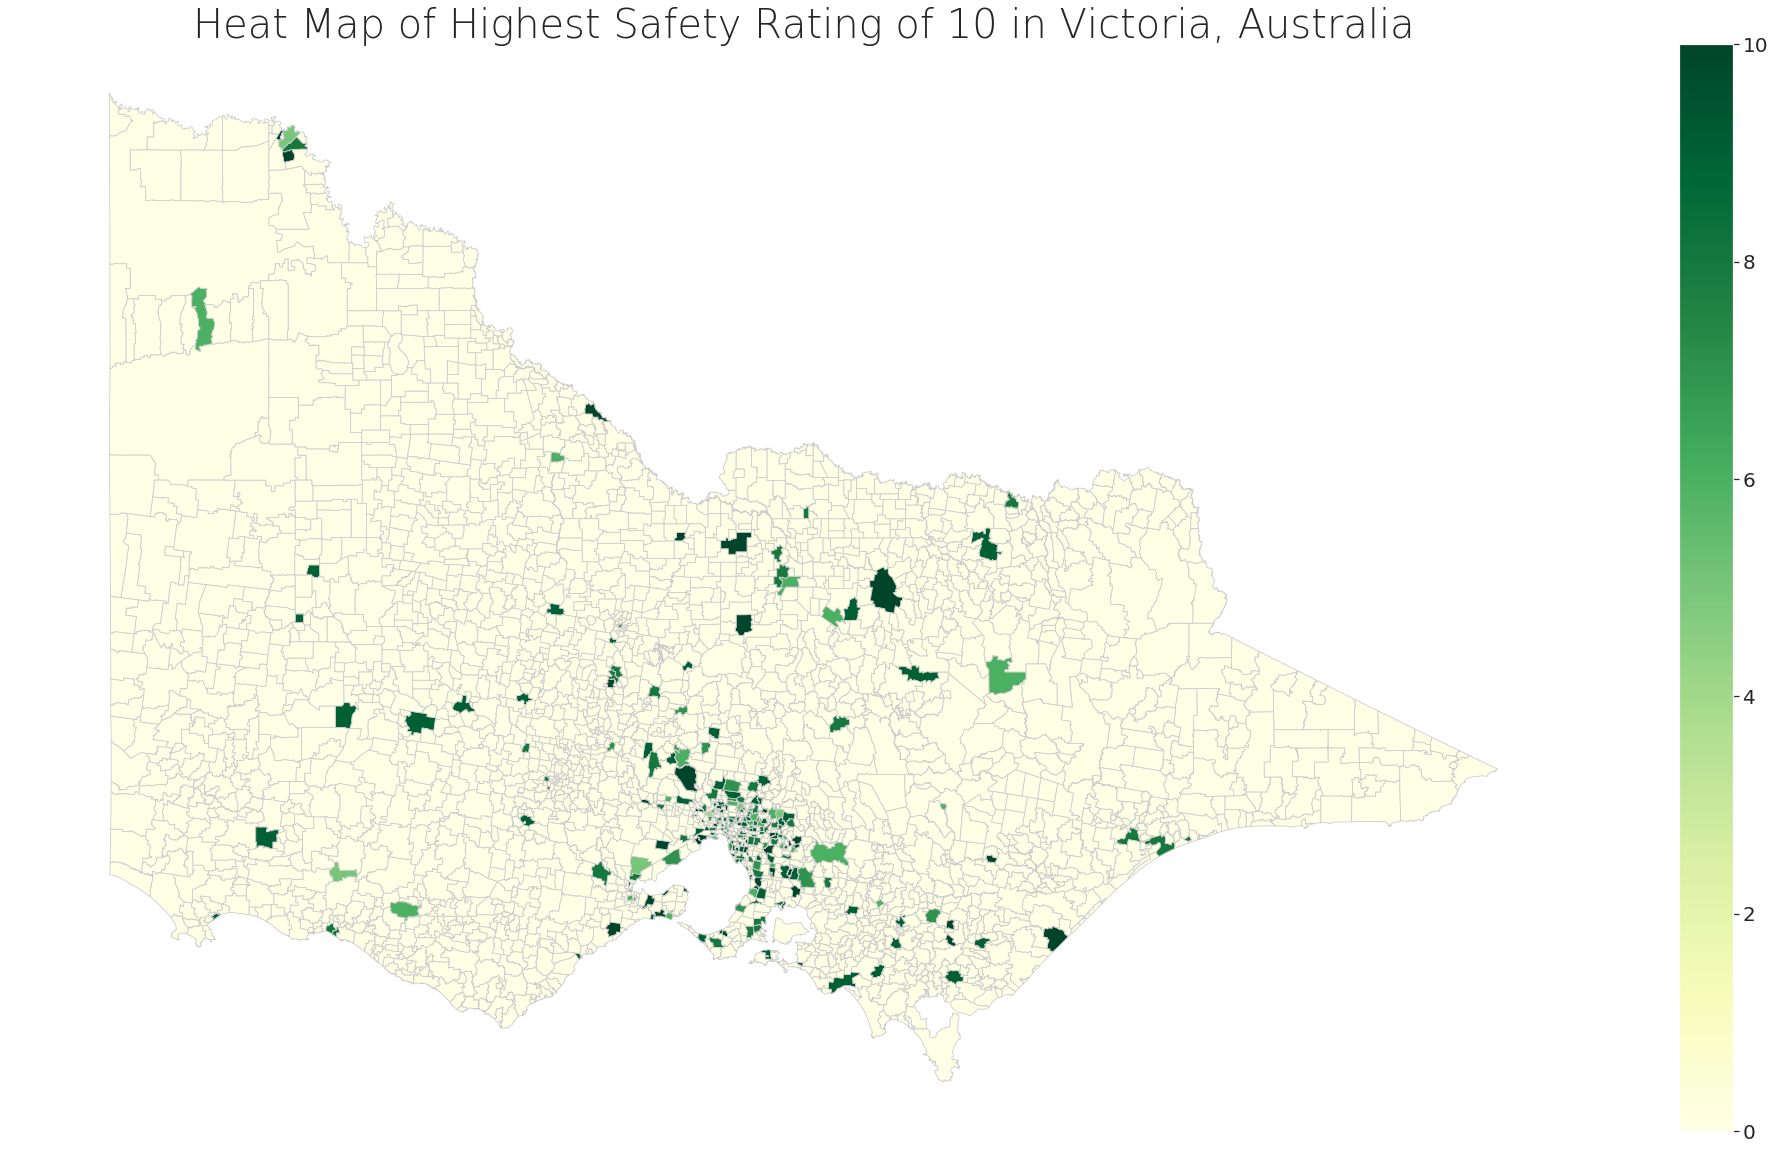

In [29]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Highest Safety Rating of 10 in Victoria, Australia', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'YlGn'
vmin, vmax = 0, 10
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

# actually plot the map
# we will only annotate the plot for neighbourhoods with more than 50 houses sold
merged.plot('rating', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in merged.iterrows():
    if(row['rating'] > 50):
        plt.annotate(text=row['suburb'], xy=(row['geometry'], row['geometry']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
plt.show()
fig.savefig('plot2.pdf')

## Moderately safe suburbs with safety rating between 9 to 7

In [30]:
merged_copy2 = merged.copy()

In [31]:
print('\nAfter transformation')
merged_copy2['rating'] = merged_copy2['rating'].replace({1.0: 0, 2.0:0, 3.0:0,4.0:0,5.0:0,6.0:0, 10.0:0})
print(merged_copy2['rating'].unique())
print('')


After transformation
[ 0.  8.  9.  7. nan]



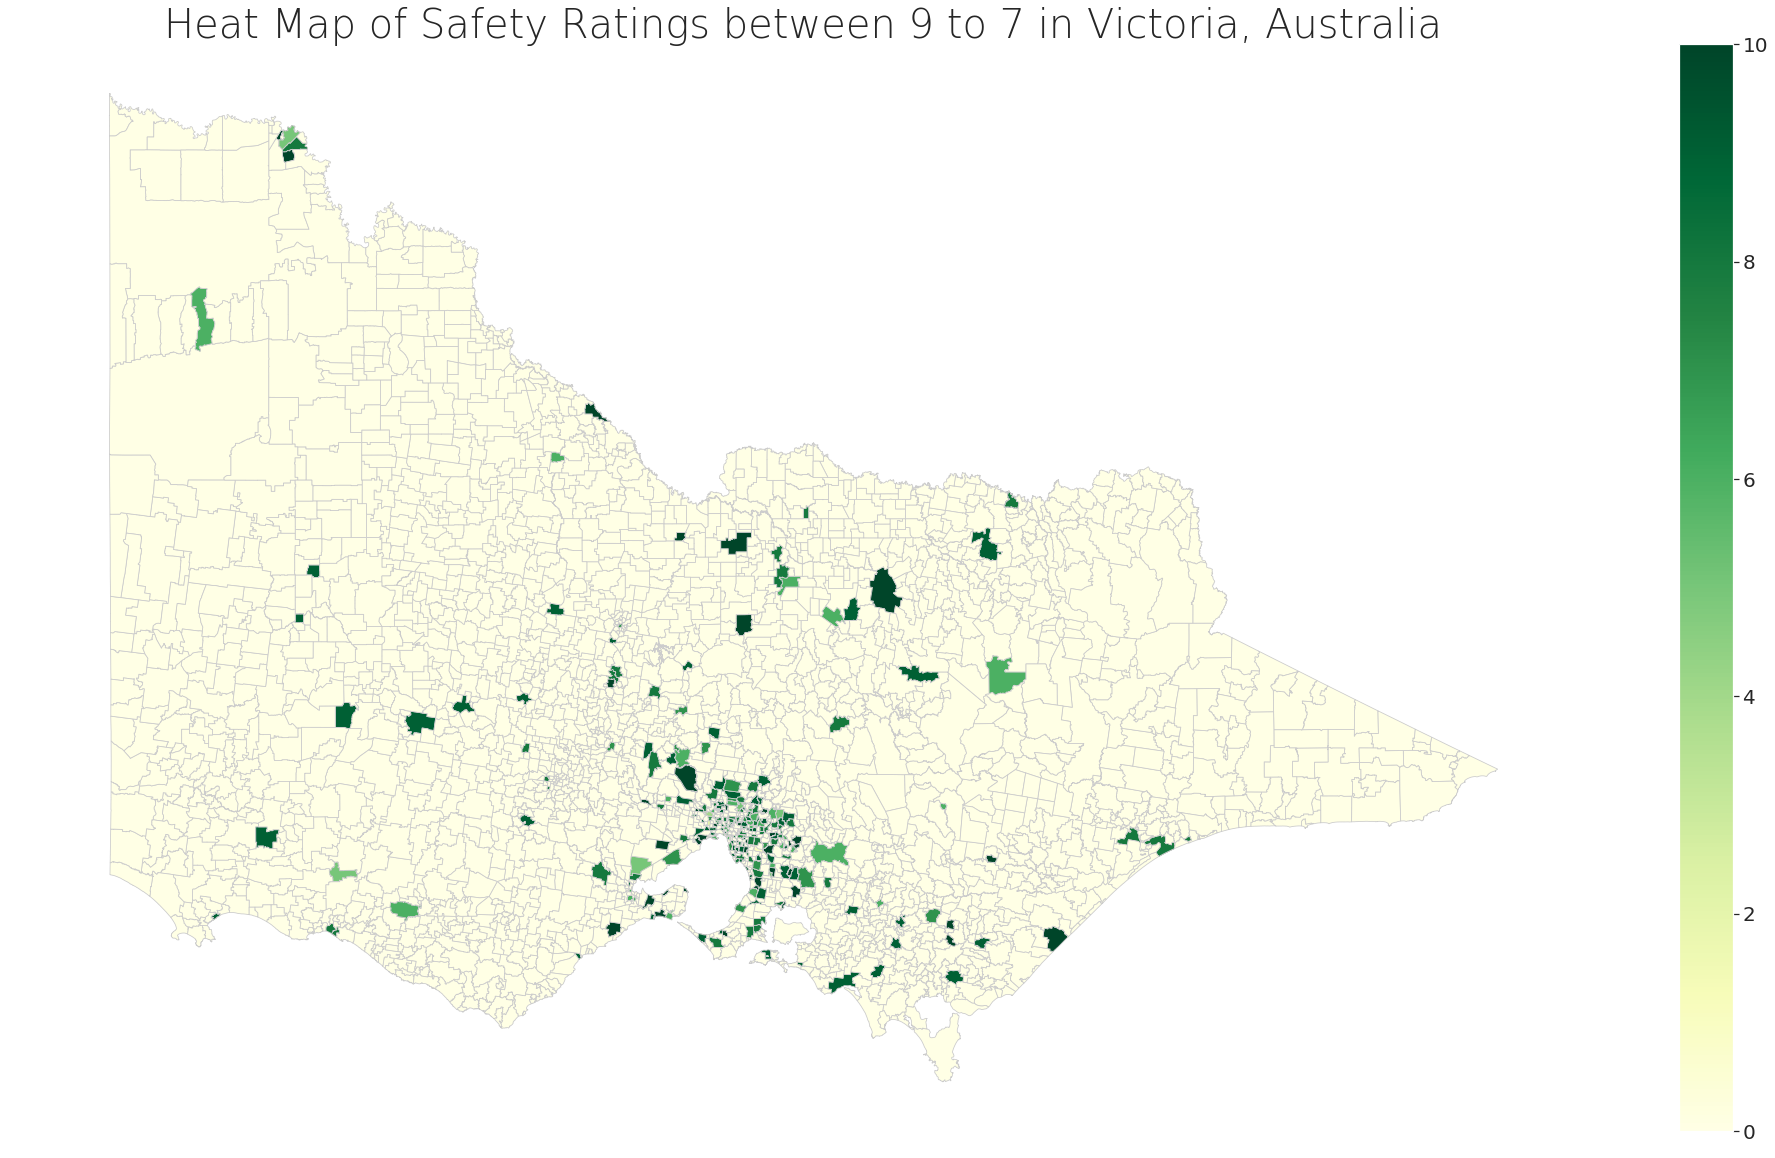

In [32]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Safety Ratings between 9 to 7 in Victoria, Australia', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'YlGn'
vmin, vmax = 0, 10
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

# actually plot the map
# we will only annotate the plot for neighbourhoods with more than 50 houses sold
merged.plot('rating', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in merged.iterrows():
    if(row['rating'] > 50):
        plt.annotate(text=row['suburb'], xy=(row['geometry'], row['geometry']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
plt.show()
fig.savefig('plot2.pdf')

## Unsafe/least safe suburbs with safety rating between 6 to 1

In [33]:
merged_copy3 = merged.copy()

In [34]:
print('\nAfter transformation')
merged_copy3['rating'] = merged_copy3['rating'].replace({1.0: 0, 2.0:0, 3.0:0,4.0:0,5.0:0,6.0:0, 10.0:0})
print(merged_copy3['rating'].unique())
print('')


After transformation
[ 0.  8.  9.  7. nan]



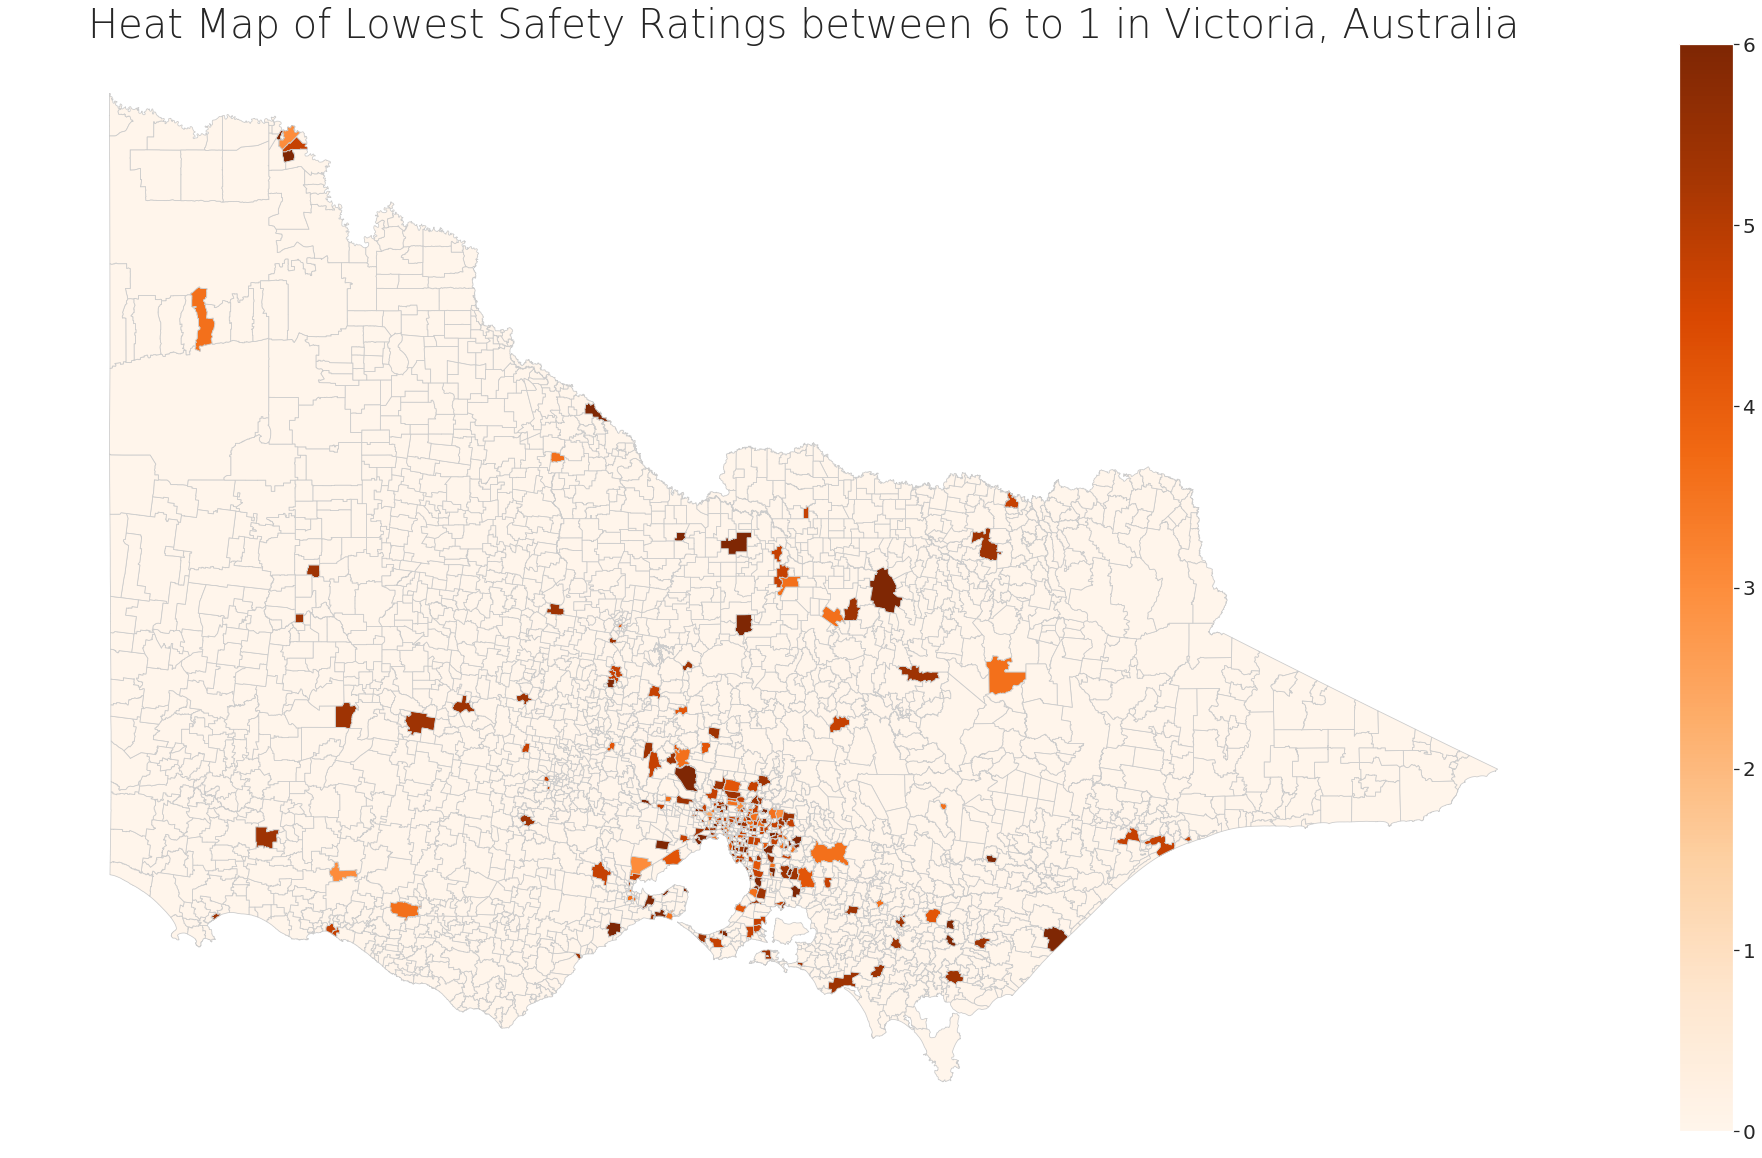

In [35]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Lowest Safety Ratings between 6 to 1 in Victoria, Australia', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'Oranges'
vmin, vmax = 0, 6
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

# actually plot the map
# we will only annotate the plot for neighbourhoods with more than 50 houses sold
merged.plot('rating', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
for idx, row in merged.iterrows():
    if(row['rating'] > 50):
        plt.annotate(text=row['suburb'], xy=(row['geometry'], row['geometry']),
                 horizontalalignment='center', fontsize='large', color='black', wrap=True)
plt.show()

## Overall safety ratings

In [36]:
suburb = df_new.loc[:,'suburb']
suburb.head()

0          NaN
1    FRANKSTON
2    FRANKSTON
3    MOORABBIN
4      MACLEOD
Name: suburb, dtype: object

In [37]:
rating = df_new.loc[:,'How safe do you feel when you are in your home?']
rating.head()

0    No Response
1    No Response
2    No Response
3    No Response
4    No Response
Name: How safe do you feel when you are in your home?, dtype: object

In [38]:
postcode = df_new.loc[:,'Postcode']
postcode.head()

0       0
1    3199
2    3199
3    3189
4    3085
Name: Postcode, dtype: int64

In [39]:
suburb = pd.DataFrame({'suburb': suburb,'rating':rating, 'postcode': postcode})
suburb.head()

suburb       rating  postcode
0        NaN  No Response         0
1  FRANKSTON  No Response      3199
2  FRANKSTON  No Response      3199
3  MOORABBIN  No Response      3189
4    MACLEOD  No Response      3085

In [40]:
suburb['suburb'] = suburb['suburb'].str.lower()

In [41]:
regions['suburb'] =regions['suburb'].str.lower()

In [42]:
print('\nAfter transformation')
suburb['rating'] = suburb['rating'].replace({'No Response': 0})
print(suburb['rating'].unique())
print('')


After transformation
[ 0.  5. 10.  9.  7.  2.  6.  8.  1.  4.  3.]



In [43]:
print(suburb.shape)
print(regions.shape)

(1126, 3)
(2973, 13)


In [44]:
a = suburb.assign(cnt=suburb.groupby('suburb').cumcount())
b = regions.assign(cnt=regions.groupby('suburb').cumcount())

In [45]:
merged1 =a.merge(b, on=['suburb','cnt'], how='left')
print(merged1.shape)
merged1.head(2)

(1126, 16)


suburb  rating  postcode  cnt LC_PLY_PID   DT_CREATE DT_RETIRE LOC_PID  \
0        NaN     0.0         0    0        NaN         NaN       NaN     NaN   
1  frankston     0.0      3199    0      10715  2017-09-07      None  VIC939   

   VIC_LOCALI VIC_LOCA_1 VIC_LOCA_3 VIC_LOCA_4 VIC_LOCA_5 VIC_LOCA_6  \
0         NaN        NaN        NaN        NaN        NaN        NaN   
1  2017-11-01       None       None       None          G       None   

  VIC_LOCA_7                                           geometry  
0        NaN                                               None  
1          2  POLYGON ((145.17297206 -38.1465126, 145.172811...

In [46]:
#Drop no postcode or wrong postcodes
merged1.dropna(subset=['suburb'], inplace=True)
print(merged1.shape)

(1080, 16)


In [47]:
merged1['rating'].value_counts().sort_index()

0.0      10
1.0       5
2.0       5
3.0       3
4.0       6
5.0      19
6.0     176
7.0      90
8.0     269
9.0     306
10.0    191
Name: rating, dtype: int64

In [48]:
df_piechart = merged1['rating'].value_counts().sort_index()

Text(0.5, 1.0, 'Percentage of Safety Ratings (in %)')

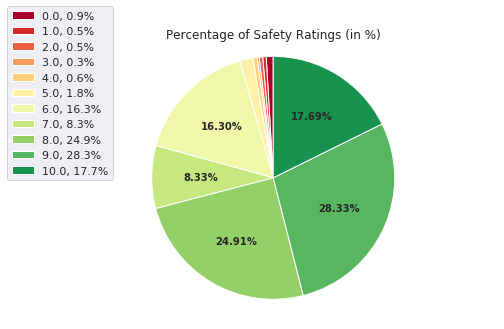

In [49]:
import matplotlib.pyplot as plt

def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = df_piechart.index
sizes = df_piechart.values
NUM_COLORS = len(sizes)

fig1, ax1 = plt.subplots(figsize=(6, 5))

#theme = plt.get_cmap('YlGn')
theme = plt.get_cmap('RdYlGn')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Percentage of Safety Ratings (in %)")

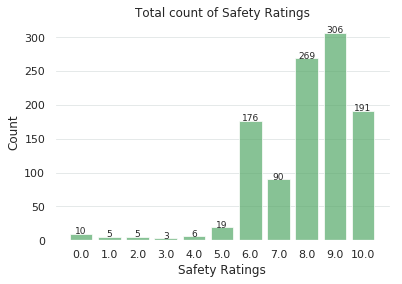

In [50]:
import numpy as np
fig, ax1 = plt.subplots()

#Plot 1
#Treatment feature
df_treatment = merged1['rating'].value_counts().sort_index()
objects = df_treatment.index
y_pos = np.arange(len(objects))
performance = df_treatment.values


ax1.bar(y_pos, performance, align='center', alpha=0.7, color='G')
ax1.set_xticks(y_pos)
ax1.set_xticklabels(df_treatment.index)
ax1.set_ylabel('Count')
ax1.set_xlabel('Safety Ratings')
ax1.set_title('Total count of Safety Ratings')
ax1.set_facecolor('white')
ax1.grid(color='#95a5a6', linewidth=.8, axis='y', alpha=0.3)

for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center", fontsize=9)
    
plt.show()

## Safest suburbs with safety rating of 10

In [51]:
merged1_copy = merged1.copy()

In [52]:
len(merged1_copy['suburb'].unique())

292

In [53]:
merged1_copy.shape

(1080, 16)

In [54]:
#Filter 10 safety rating
safe_subs = merged1_copy[(merged1_copy['rating'] == 10)]

print(safe_subs.shape)
safe_subs.head()

(191, 16)


suburb  rating  postcode  cnt LC_PLY_PID   DT_CREATE DT_RETIRE  \
12  indented head    10.0      3223    0      10002  2013-11-26      None   
14        delahey    10.0      3037    0      10181  2015-12-04      None   
29     blackwarry    10.0      3844    0      10718  2017-09-07      None   
38        chintin    10.0      3756    0       7489  2011-08-31      None   
41  campaspe west    10.0      3564    1        NaN         NaN       NaN   

    LOC_PID  VIC_LOCALI VIC_LOCA_1 VIC_LOCA_3 VIC_LOCA_4 VIC_LOCA_5  \
12  VIC1221  2012-04-27       None       None       None          G   
14   VIC727  2016-01-25       None       None       None          G   
29   VIC256  2017-11-01       None       None       None          G   
38   VIC553  2012-04-27       None       None       None          G   
41      NaN         NaN        NaN        NaN        NaN        NaN   

   VIC_LOCA_6 VIC_LOCA_7                                           geometry  
12       None          2  POLYGON ((144.7165235 -38.14398648, 144.716818...  
14       None          2  POLYGON ((144.764359894 -37.72431483, 144.7643...  
29       None          2  POLYGON ((146.65275504 -38.43310502, 146.65125...  
38       None          2  POLYGON ((144.81842252 -37.42669756, 144.81815...  
41        NaN        NaN                                               None

In [55]:
len(safe_subs['suburb'].unique())

127

In [56]:
safe_subs[['suburb', 'rating', 'postcode']]

suburb  rating  postcode
12       indented head    10.0      3223
14             delahey    10.0      3037
29          blackwarry    10.0      3844
38             chintin    10.0      3756
41       campaspe west    10.0      3564
42          bailieston    10.0      3608
48          bona vista    10.0      3820
53          yarraville    10.0      3013
76      doncaster east    10.0      3109
80      doncaster east    10.0      3109
124          chadstone    10.0      3148
128            bulleen    10.0      3105
134         noble park    10.0      3174
142           bundoora    10.0      3083
148        craigieburn    10.0      3064
149            donvale    10.0      3111
167            cocoroc    10.0      3030
185           brighton    10.0      3186
196         cheltenham    10.0      3192
205   hoppers crossing    10.0      3029
209        mooroolbark    10.0      3138
212            mitcham    10.0      3132
216        keysborough    10.0      3173
220          melbourne    10.0      3004
224            kilsyth    10.0      3137
231          bentleigh    10.0      3204
240            sunbury    10.0      3429
252            sunbury    10.0      3429
253      indented head    10.0      3223
258           childers    10.0      3824
...                ...     ...       ...
952            burnley    10.0      3121
953          thornbury    10.0      3071
957        ocean grove    10.0      3226
959        castlemaine    10.0      3450
960     mount waverley    10.0      3149
965            leopold    10.0      3224
967        ocean grove    10.0      3226
972            ivanhoe    10.0      3079
974          bentleigh    10.0      3204
977          bentleigh    10.0      3204
979             dawson    10.0      3858
982       hampton park    10.0      3976
994           pakenham    10.0      3810
1004      arthurs seat    10.0      3936
1011         thornbury    10.0      3071
1013           banyule    10.0      3084
1018            cotham    10.0      3101
1024     indented head    10.0      3223
1031         bentleigh    10.0      3204
1040           bareena    10.0      3220
1041      beaconsfield    10.0      3807
1053    altona meadows    10.0      3028
1054    caulfield east    10.0      3145
1062     fountain gate    10.0      3805
1065         bayswater    10.0      3153
1066          pakenham    10.0      3810
1078    oakleigh south    10.0      3167
1085           sunbury    10.0      3429
1116         churchill    10.0      3842
1124     indented head    10.0      3223

[191 rows x 3 columns]

In [57]:
slide2 = safe_subs[['suburb', 'rating', 'postcode']].sort_values(by = 'suburb', ascending = True)

In [58]:
slide2 = slide2.drop_duplicates(subset='suburb', keep='first')
slide2_2 =slide2.iloc[34:68]
slide2_3 =slide2.iloc[68:127]

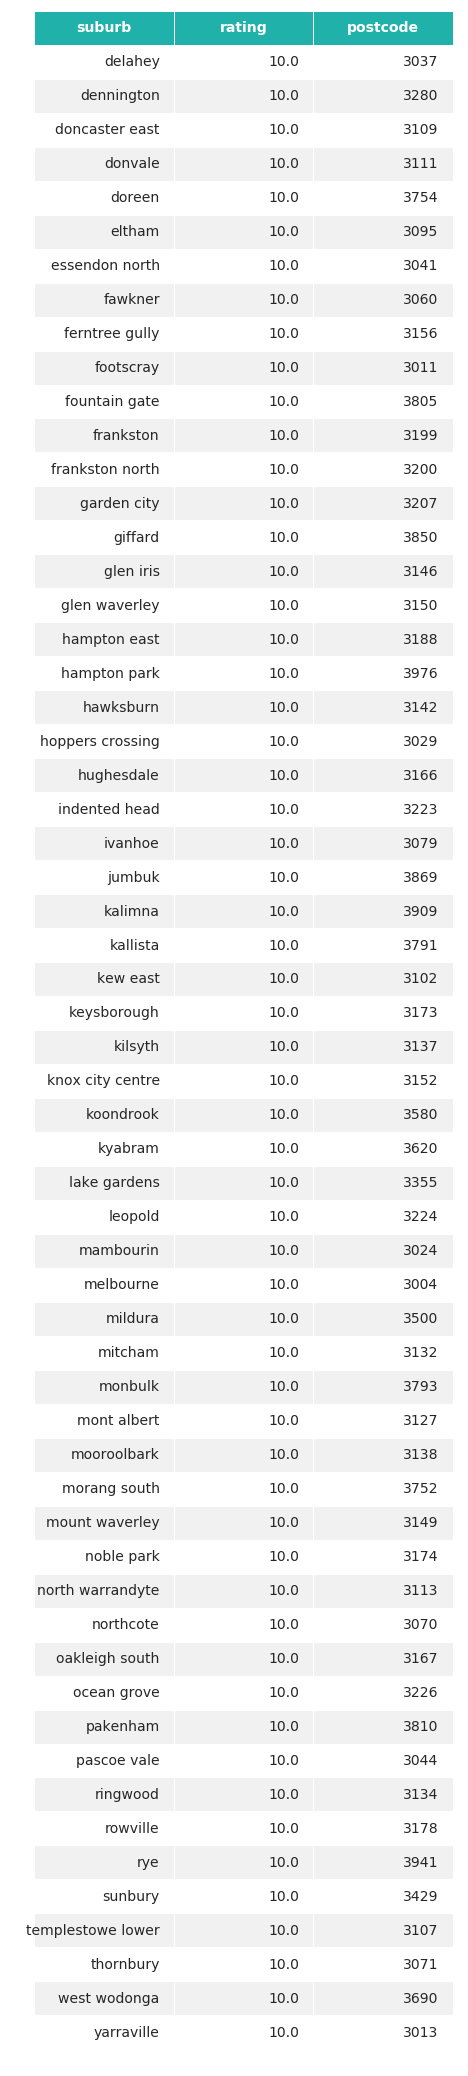

In [59]:
import six
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='lightseagreen', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(slide2_3, header_columns=0, col_width=2.5)

### Type of Home

In [60]:
slide3 = df_new.rename(columns={'How safe do you feel when you are in your home?': 'rating'})

In [61]:
print('\nAfter transformation')
slide3['rating'] = slide3 ['rating'].replace({'No Response': 0})
print(slide3['rating'].unique())
print('')


After transformation
[ 0.  5. 10.  9.  7.  2.  6.  8.  1.  4.  3.]



In [62]:
#Drop no postcode or wrong postcodes
slide3.dropna(subset=['suburb'], inplace=True)
print(slide3.shape)

(1080, 44)


In [63]:
#Filter 10 again
safe_subs3 = slide3[(slide3['rating'] == 10)]

print(safe_subs3.shape)
safe_subs3.head()

(191, 44)


Postcode  rating What type of home do you live in?  \
12      3223    10.0                              Farm   
14      3037    10.0                             House   
29      3844    10.0                             House   
38      3756    10.0                             House   
41      3564    10.0                             House   

   Which of the following external doors does your home have?  \
12                Front door, Rear door, Side door(s)           
14                Front door, Rear door, Side door(s)           
29                              Front door, Rear door           
38                Front door, Rear door, Side door(s)           
41                           Front door, Side door(s)           

                How well do you know your neighbours?  \
12  I know them very well and leave a spare key wi...   
14  I know them fairly well, we keep an eye on eac...   
29  I know them fairly well, we keep an eye on eac...   
38  I know them fairly well, we keep an eye on eac...   
41  I know them fairly well, we keep an eye on eac...   

   Keys stored out of sight in a secret spot.  \
12                                No Response   
14                                No Response   
29                                No Response   
38                                         No   
41                                         No   

   Spare keys not hidden in obvious places outside the home  \
12                                                Yes         
14                                                Yes         
29                                                 No         
38                                                 No         
41                                                 No         

   Keys not kept in locks when not at home  \
12                                     Yes   
14                                     Yes   
29                                      No   
38                                      No   
41                                      No   

   Spare key kept with trusted friend, relative or neighbour  \
12                                                Yes          
14                                                Yes          
29                                                Yes          
38                                                Yes          
41                                                Yes          

   Does your home have any security systems?  ...   \
12                                        No  ...    
14                                        No  ...    
29                                        No  ...    
38                                        No  ...    
41                                        No  ...    

   Do you have any outdoor buildings such as sheds, a studio or granny flat?  \
12                                                Yes                          
14                                                Yes                          
29                                                Yes                          
38                                                 No                          
41                                                 No                          

   Which of these security measures do you have on your outdoor buildings  \
12                                 Lockable door bolt                       
14     Building secured to ground, Quality keyed lock                       
29  Building secured to ground, Solid core door an...                       
38                                        No Response                       
41                                        No Response                       

   Does your home have an enclosed garage?  \
12                                     Yes   
14                                     Yes   
29                                      No   
38                                     Yes   
41                                     Yes   

   What security measures do you have i

In [64]:
safe_subs3['What type of home do you live in?'].value_counts().sort_values()

Farm                5
Apartment           7
Unit/Townhouse     30
House             149
Name: What type of home do you live in?, dtype: int64

In [65]:
df_piechart2 = safe_subs3['What type of home do you live in?'].value_counts().sort_values()

Text(0.5, 1.0, 'Type of Home (in %)')

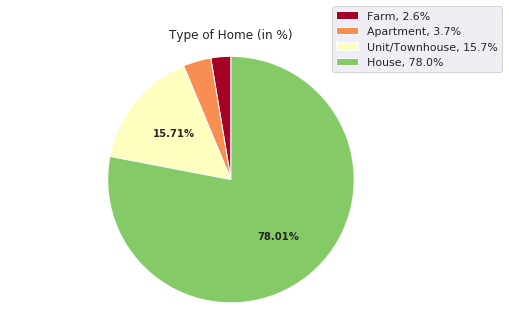

In [66]:
df_piechart2 = safe_subs3['What type of home do you live in?'].value_counts().sort_values()
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = df_piechart2.index
sizes = df_piechart2.values
NUM_COLORS = len(sizes)

fig1, ax1 = plt.subplots(figsize=(6, 5))

#theme = plt.get_cmap('YlGn')
theme = plt.get_cmap('RdYlGn')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.85, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Type of Home (in %)")

### Type of Doors

Text(0.5, 1.0, 'Type of External Doors (in %)')

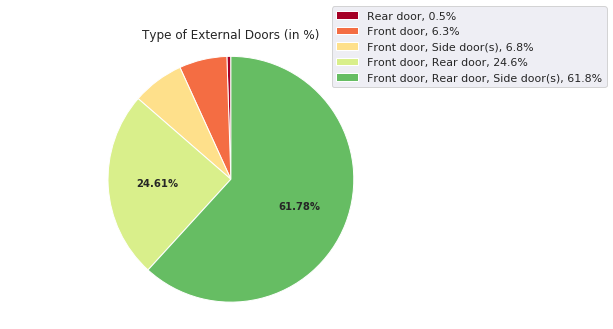

In [67]:
df_piechart3 = safe_subs3['Which of the following external doors does your home have?'].value_counts().sort_values()
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = df_piechart3.index
sizes = df_piechart3.values
NUM_COLORS = len(sizes)

fig1, ax1 = plt.subplots(figsize=(6, 5))

#theme = plt.get_cmap('YlGn')
theme = plt.get_cmap('RdYlGn')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.85, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Type of External Doors (in %)")

### Type of Fences

Text(0.5, 1.0, 'Fences in the House(in %)')

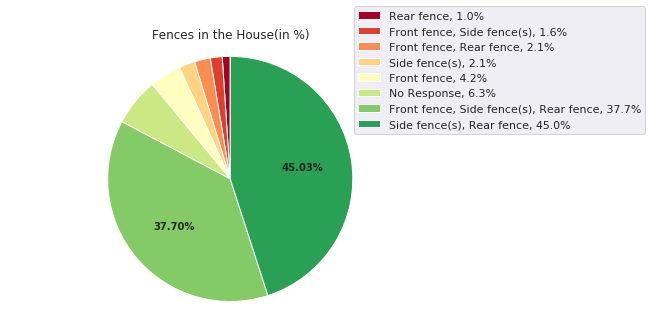

In [68]:
df_piechart4 = safe_subs3['What fences does your property have?'].value_counts().sort_values()
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = df_piechart4.index
sizes = df_piechart4.values
NUM_COLORS = len(sizes)

fig1, ax1 = plt.subplots(figsize=(6, 5))

#theme = plt.get_cmap('YlGn')
theme = plt.get_cmap('RdYlGn')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.9, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Fences in the House(in %)")

### Security alarm at home

Text(0.5, 1.0, 'Does your home have any\n security systems? (in %)')

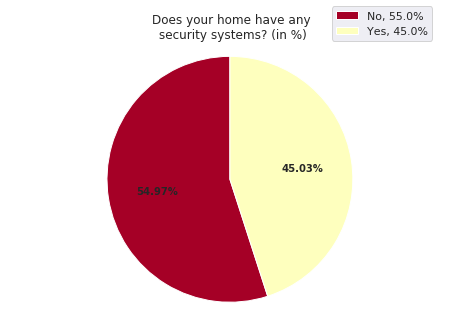

In [69]:
df_piechart4 = safe_subs3['Does your home have any security systems?'].value_counts().sort_index()
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = df_piechart4.index
sizes = df_piechart4.values
NUM_COLORS = len(sizes)

fig1, ax1 = plt.subplots(figsize=(6, 5))

theme = plt.get_cmap('RdYlGn')
#theme = plt.get_cmap('hot')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.85, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Does your home have any\n security systems? (in %)")

### House security measures

In [70]:
doorslocked = safe_subs3['I keep all my doors and windows locked when I’m at home or in my yard'].value_counts().sort_index()
doorslockedperc = np.true_divide(doorslocked.values, doorslocked.sum())*100

In [71]:
skylightlocked = safe_subs3['Any manholes or skylights are kept locked and/or bolted from the inside'].value_counts().sort_index()

In [72]:
computers =safe_subs3['Computers, televisions and other electronics not visible from outside'].value_counts().sort_index()
computersperc =np.true_divide(computers.values, computers.sum())*100

In [73]:
doorseen = safe_subs3['Front door and entry can be seen from street'].value_counts().sort_index()
doorseenperc =np.true_divide(doorseen.values, doorseen.sum())*100

In [74]:
housenum = safe_subs3['House number is clearly displayed'].value_counts().sort_index()
housenumperc =np.true_divide(housenum.values, housenum.sum())*100

In [75]:
housenumvis = safe_subs3['House number is visible at night'].value_counts().sort_index()
housenumvisperc =np.true_divide(housenumvis.values, housenumvis.sum())*100

In [76]:
gard = safe_subs3['Garden kept short and neat'].value_counts().sort_index()
gardperc =np.true_divide(gard.values, gard.sum())*100

In [77]:
camera= safe_subs3['Security camera faces entry'].value_counts().sort_index()
camperc = np.true_divide(camera.values, camera.sum())*100

In [78]:
dog= safe_subs3['I have a dog'].value_counts().sort_index()
dogperc = np.true_divide(dog.values, dog.sum())*100

In [79]:
value= safe_subs3['Valuables kept in a secured, locked safe located out of sight.'].value_counts().sort_index()
valueperc = np.true_divide(value.values, value.sum())*100

In [80]:
sensorlight= safe_subs3['I have sensor lighting or timed lighting in my house for when I’m not at home'].value_counts().sort_index()
sensorlightperc = np.true_divide(sensorlight.values, sensorlight.sum())*100

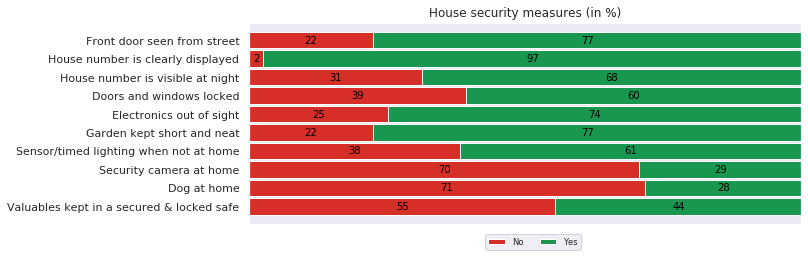

In [81]:
col_names = ["No",'Yes'] 
results = { 'Front door seen from street': doorseenperc,
           'House number is clearly displayed': housenumperc,
           'House number is visible at night': housenumvisperc,
           "Doors and windows locked": doorslockedperc,
           'Electronics out of sight': computersperc,
          'Garden kept short and neat': gardperc,
           'Sensor/timed lighting when not at home': sensorlightperc,
           'Security camera at home': camperc,
           'Dog at home': dogperc,
           'Valuables kept in a secured & locked safe': valueperc}
def survey(results, col_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.1, 0.90, data.shape[1]))
    fig, ax = plt.subplots(figsize=(9.9, 3.7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    for i, (colname, color) in enumerate(zip(col_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.9, label=colname, color=color)
        xcenters = starts + widths / 2
        r, g, b, _ = color
        text_color = 'black' 
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(col_names), bbox_to_anchor=(0.42, -0.15),
              loc='lower left', fontsize='small')
    return fig, ax
     
survey(results, col_names) 
plt.title("House security measures (in %)")

fig.tight_layout()
plt.show()
fig.savefig('plot5.pdf')

## Moderately safe suburbs with safety rating between 9 to 7

In [82]:
#Filter 9 to 7 safety rating
msafe_subs = merged1_copy[merged1_copy.rating.isin([7,8,9])]

print(msafe_subs.shape)

(665, 16)


In [83]:
len(msafe_subs['suburb'].unique())

247

In [84]:
table3 =msafe_subs[['suburb', 'rating', 'postcode']].sort_values(by = 'suburb', ascending = True)

In [85]:
table3 = table3.drop_duplicates(subset='suburb', keep='first')
table3_1 =table3.iloc[0:34]
table3_2 =table3.iloc[34:68]
table3_3 =table3.iloc[68:120]

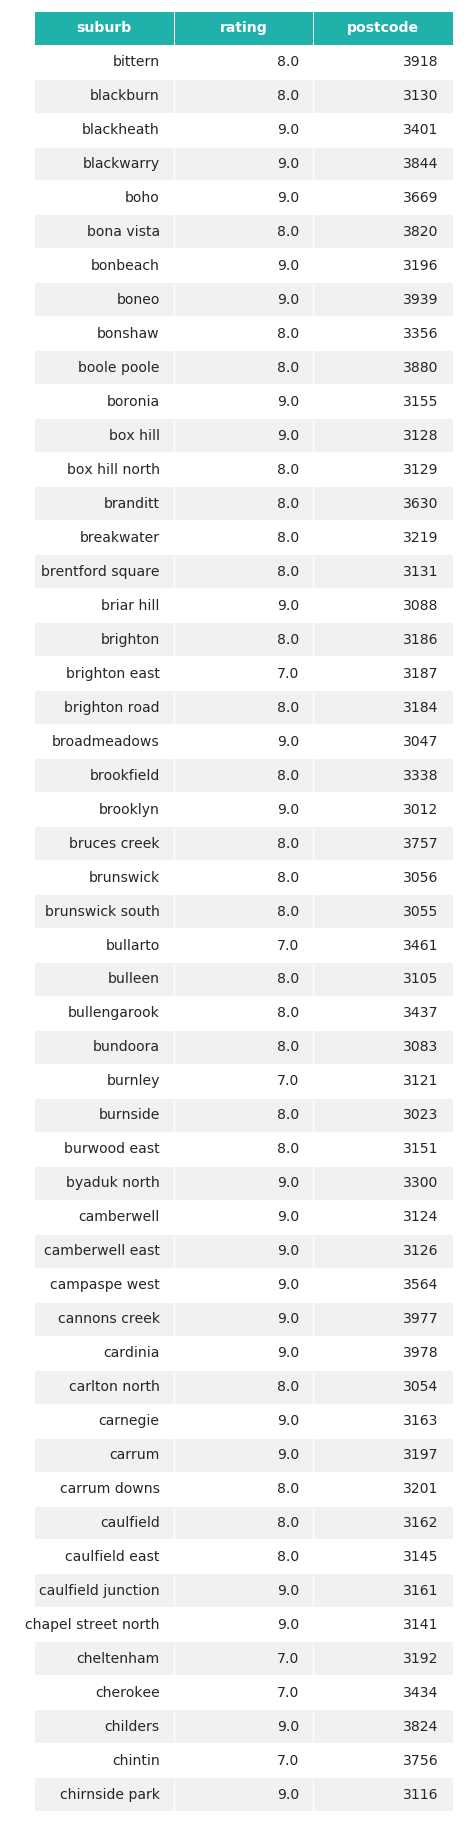

In [86]:
import six
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='lightseagreen', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(table3_3, header_columns=0, col_width=2.5)

In [87]:
#Filter 7 to 9 safety rating
midsafe_subs =slide3[slide3.rating.isin([7,8,9])]

print(midsafe_subs.shape)
midsafe_subs.head()

(665, 44)


Postcode  rating What type of home do you live in?  \
13      3335     9.0                             House   
15      3026     9.0                             House   
17      3444     7.0                         Apartment   
20      3086     7.0                             House   
22      3108     9.0                             House   

   Which of the following external doors does your home have?  \
13                Front door, Rear door, Side door(s)           
15                Front door, Rear door, Side door(s)           
17                                         Front door           
20                              Front door, Rear door           
22                Front door, Rear door, Side door(s)           

                How well do you know your neighbours?  \
13  I know them to say hello and we talk occasiona...   
15  I know them fairly well, we keep an eye on eac...   
17  I know them to say hello and we talk occasiona...   
20  I know them to say hello and we talk occasiona...   
22  I know them fairly well, we keep an eye on eac...   

   Keys stored out of sight in a secret spot.  \
13                                No Response   
15                                No Response   
17                                No Response   
20                                No Response   
22                                No Response   

   Spare keys not hidden in obvious places outside the home  \
13                                                 No         
15                                                 No         
17                                                Yes         
20                                                 No         
22                                                Yes         

   Keys not kept in locks when not at home  \
13                                      No   
15                                     Yes   
17                                     Yes   
20                                      No   
22                                     Yes   

   Spare key kept with trusted friend, relative or neighbour  \
13                                                 No          
15                                                Yes          
17                                                Yes          
20                                                Yes          
22                                                Yes          

   Does your home have any security systems?  ...   \
13                                       Yes  ...    
15                                       Yes  ...    
17                                        No  ...    
20                                        No  ...    
22                                       Yes  ...    

   Do you have any outdoor buildings such as sheds, a studio or granny flat?  \
13                                                Yes                          
15                                                Yes                          
17                                                Yes                          
20                                                 No                          
22                                                Yes                          

   Which of these security measures do you have on your outdoor buildings  \
13                                        No Response                       
15     Building secured to ground, Quality keyed lock                       
17  Building secured to ground, Solid core door an...                       
20                                        No Response                       
22  Building secured to ground, Quality keyed lock...                       

   Does your home have an enclosed garage?  \
13                                     Yes   
15                                     Yes   
17                                      No   
20                                      No   
22                                      No   

   What security measures do you have i

In [88]:
len(midsafe_subs['suburb'].unique())

247

### Type of Home

In [89]:
midsafe_subs['What type of home do you live in?'].value_counts().sort_values()

Farm                8
Apartment           8
Unit/Townhouse    100
House             549
Name: What type of home do you live in?, dtype: int64

Text(0.5, 1.0, 'Type of Home (in %)')

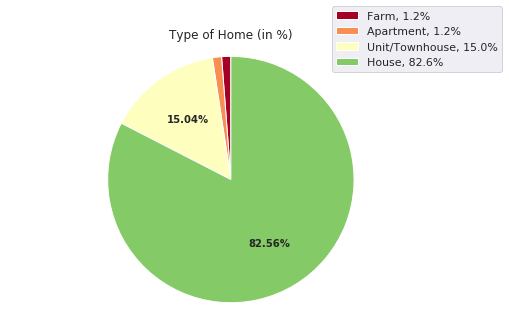

In [90]:
mdf_piechart1 = midsafe_subs['What type of home do you live in?'].value_counts().sort_values()
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = mdf_piechart1.index
sizes = mdf_piechart1.values
NUM_COLORS = len(sizes)

fig1, ax1 = plt.subplots(figsize=(6, 5))

#theme = plt.get_cmap('YlGn')
theme = plt.get_cmap('RdYlGn')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.85, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Type of Home (in %)")

### Type of Doors

Text(0.5, 1.0, 'Type of External Doors (in %)')

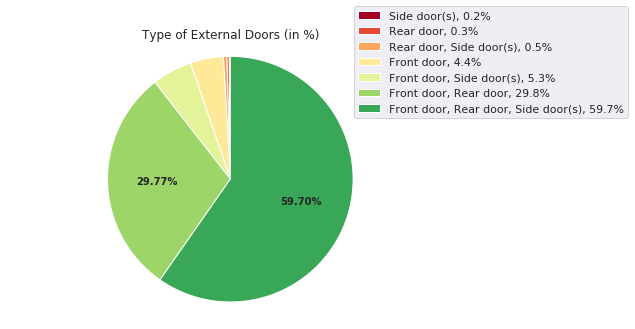

In [91]:
mdf_piechart2 = midsafe_subs['Which of the following external doors does your home have?'].value_counts().sort_values()
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = mdf_piechart2.index
sizes = mdf_piechart2.values
NUM_COLORS = len(sizes)

fig1, ax1 = plt.subplots(figsize=(6, 5))

#theme = plt.get_cmap('YlGn')
theme = plt.get_cmap('RdYlGn')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.9, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Type of External Doors (in %)")

### Type of Fence

Text(0.5, 1.0, 'Fences in the House(in %)')

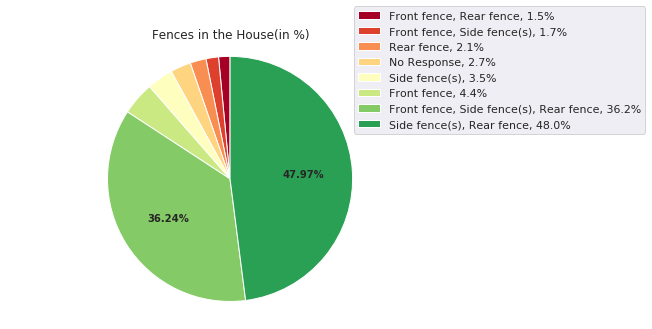

In [92]:
mdf_piechart3 = midsafe_subs['What fences does your property have?'].value_counts().sort_values()
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = mdf_piechart3.index
sizes = mdf_piechart3.values
NUM_COLORS = len(sizes)

fig1, ax1 = plt.subplots(figsize=(6, 5))

#theme = plt.get_cmap('YlGn')
theme = plt.get_cmap('RdYlGn')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.9, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Fences in the House(in %)")

### Security alarm at home

Text(0.5, 1.0, 'Does your home have any\n security systems? (in %)')

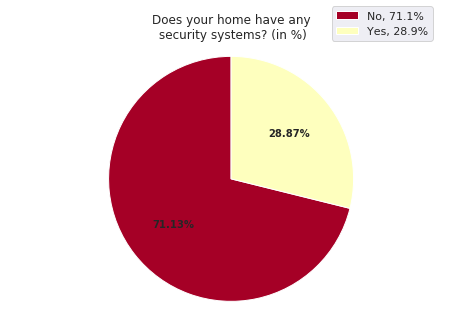

In [93]:
mdf_piechart4 = midsafe_subs['Security camera faces entry'].value_counts().sort_index()
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = mdf_piechart4.index
sizes = mdf_piechart4.values
NUM_COLORS = len(sizes)

fig1, ax1 = plt.subplots(figsize=(6, 5))

#theme = plt.get_cmap('YlGn')
theme = plt.get_cmap('RdYlGn')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.85, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Does your home have any\n security systems? (in %)")

### House security measures

In [94]:
doorslockedm = midsafe_subs['I keep all my doors and windows locked when I’m at home or in my yard'].value_counts().sort_index()
doorslockedpercm = np.true_divide(doorslockedm.values, doorslockedm.sum())*100
doorslockedpercm

array([37.14285714, 62.85714286])

In [95]:
computersm =midsafe_subs['Computers, televisions and other electronics not visible from outside'].value_counts().sort_index()
computerspercm =np.true_divide(computersm.values, computersm.sum())*100
computerspercm

array([31.42857143, 68.57142857])

In [96]:
doorseenm = midsafe_subs['Front door and entry can be seen from street'].value_counts().sort_index()
doorseenpercm =np.true_divide(doorseenm.values, doorseenm.sum())*100
doorseenpercm

array([24.36090226, 75.63909774])

In [97]:
housenumm = midsafe_subs['House number is clearly displayed'].value_counts().sort_index()
housenumpercm =np.true_divide(housenumm.values, housenumm.sum())*100
housenumpercm

array([ 4.21052632, 95.78947368])

In [98]:
housenumvism = midsafe_subs['House number is visible at night'].value_counts().sort_index()
housenumvispercm =np.true_divide(housenumvism.values, housenumvism.sum())*100
housenumvispercm

array([36.09022556, 63.90977444])

In [99]:
gardm = midsafe_subs['Garden kept short and neat'].value_counts().sort_index()
gardpercm =np.true_divide(gardm.values, gardm.sum())*100
gardpercm

array([24.36090226, 75.63909774])

In [100]:
cameram= midsafe_subs['Security camera faces entry'].value_counts().sort_index()
campercm = np.true_divide(cameram.values, cameram.sum())*100
campercm

array([71.12781955, 28.87218045])

In [101]:
dogm= midsafe_subs['I have a dog'].value_counts().sort_index()
dogpercm = np.true_divide(dogm.values, dogm.sum())*100
dogpercm

array([67.51879699, 32.48120301])

In [102]:
sensorlightm= midsafe_subs['I have sensor lighting or timed lighting in my house for when I’m not at home'].value_counts().sort_index()
sensorlightpercm = np.true_divide(sensorlightm.values, sensorlightm.sum())*100
sensorlightpercm

array([34.73684211, 65.26315789])

In [103]:
valuem= midsafe_subs['Valuables kept in a secured, locked safe located out of sight.'].value_counts().sort_index()
valuepercm = np.true_divide(valuem.values, valuem.sum())*100
valuepercm

array([61.95488722, 38.04511278])

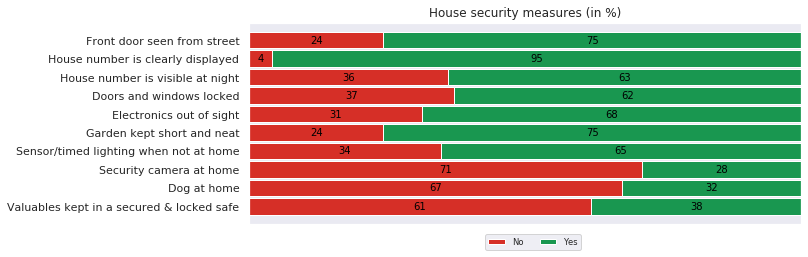

In [104]:
col_names = ["No",'Yes'] 
results = { 'Front door seen from street': doorseenpercm,
           'House number is clearly displayed': housenumpercm,
           'House number is visible at night': housenumvispercm,
           "Doors and windows locked": doorslockedpercm,
           'Electronics out of sight': computerspercm,
          'Garden kept short and neat': gardpercm,
           'Sensor/timed lighting when not at home': sensorlightpercm,
           'Security camera at home': campercm,
           'Dog at home': dogpercm,
           'Valuables kept in a secured & locked safe': valuepercm}
def survey(results, col_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.1, 0.90, data.shape[1]))
    fig, ax = plt.subplots(figsize=(9.9, 3.7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    for i, (colname, color) in enumerate(zip(col_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.9, label=colname, color=color)
        xcenters = starts + widths / 2
        r, g, b, _ = color
        text_color = 'black' 
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(col_names), bbox_to_anchor=(0.42, -0.15),
              loc='lower left', fontsize='small')
    return fig, ax
     
survey(results, col_names) 
plt.title("House security measures (in %)")

fig.tight_layout()
plt.show()

## Unsafe/least safe suburbs with safety rating between 6 to 1

In [105]:
#Filter 6 to 1 safety rating
nsafe_subs = merged1_copy[merged1_copy.rating.isin([1,2,3,4,5,6])]

print(nsafe_subs.shape)
nsafe_subs.head()

(214, 16)


suburb  rating  postcode  cnt LC_PLY_PID   DT_CREATE DT_RETIRE  \
11        mornington     5.0      3931    0       6647  2011-08-31      None   
16  hoppers crossing     5.0      3029    0       9942  2013-11-26      None   
18    belvedere park     2.0      3198    0        NaN         NaN       NaN   
19         bell park     5.0      3215    0       6818  2011-08-31      None   
21           glenroy     6.0      3046    0      10989  2018-03-05      None   

    LOC_PID  VIC_LOCALI VIC_LOCA_1 VIC_LOCA_3 VIC_LOCA_4 VIC_LOCA_5  \
11  VIC1757  2012-04-27       None       None       None          G   
16  VIC1195  2013-08-05       None       None       None          G   
18      NaN         NaN        NaN        NaN        NaN        NaN   
19   VIC191  2012-04-27       None       None       None          G   
21  VIC1037  2018-05-12       None       None       None          G   

   VIC_LOCA_6 VIC_LOCA_7                                           geometry  
11       None          2  POLYGON ((145.06100227 -38.20092728, 145.06127...  
16       None          2  POLYGON ((144.66510003 -37.87181902, 144.66512...  
18        NaN        NaN                                               None  
19       None          2  POLYGON ((144.33340302 -38.11969903, 144.33326...  
21       None          2  POLYGON ((144.937074 -37.71103003, 144.9372779...

In [106]:
len(nsafe_subs['suburb'].unique())

126

In [107]:
table2 = nsafe_subs[['suburb', 'rating', 'postcode']].sort_values(by = 'suburb', ascending = True)

In [108]:
table2 = table2.drop_duplicates(subset='suburb', keep='first')
table2_1 =table2.iloc[0:34]
table2_2 =table2.iloc[34:68]
table2_3 =table2.iloc[68:120]

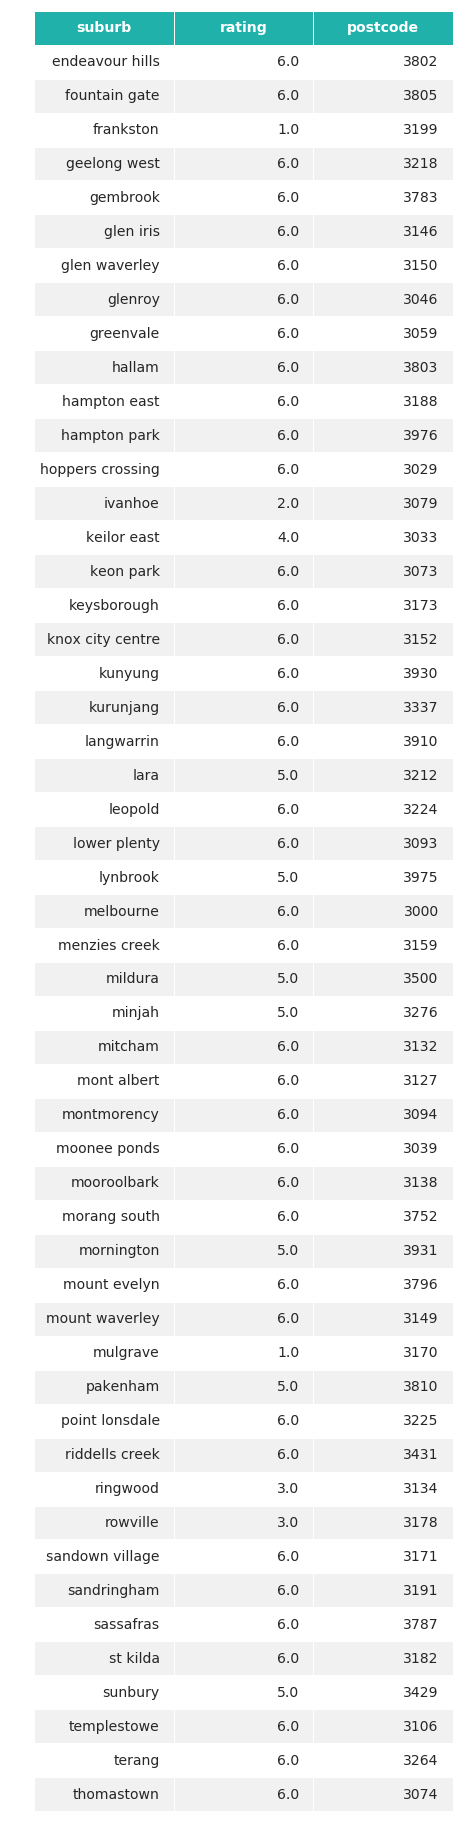

In [109]:
import six
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='lightseagreen', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(table2_3, header_columns=0, col_width=2.5)

In [110]:
#Filter 1 to 6 safety rating
notsafe_subs =slide3[slide3.rating.isin([1,2,3,4,5,6])]

print(notsafe_subs.shape)
notsafe_subs.head()

(214, 44)


Postcode  rating What type of home do you live in?  \
11      3931     5.0                             House   
16      3029     5.0                             House   
18      3198     2.0                             House   
19      3215     5.0                             House   
21      3046     6.0                             House   

   Which of the following external doors does your home have?  \
11                Front door, Rear door, Side door(s)           
16                Front door, Rear door, Side door(s)           
18                Front door, Rear door, Side door(s)           
19                              Front door, Rear door           
21                              Front door, Rear door           

                How well do you know your neighbours?  \
11  I know them very well and leave a spare key wi...   
16  I know them to say hello and we talk occasiona...   
18                                  I don’t know them   
19  I know them to say hello and we talk occasiona...   
21  I know them to say hello and we talk occasiona...   

   Keys stored out of sight in a secret spot.  \
11                                No Response   
16                                No Response   
18                                No Response   
19                                No Response   
21                                No Response   

   Spare keys not hidden in obvious places outside the home  \
11                                                Yes         
16                                                Yes         
18                                                Yes         
19                                                Yes         
21                                                 No         

   Keys not kept in locks when not at home  \
11                                     Yes   
16                                     Yes   
18                                     Yes   
19                                     Yes   
21                                      No   

   Spare key kept with trusted friend, relative or neighbour  \
11                                                Yes          
16                                                Yes          
18                                                Yes          
19                                                Yes          
21                                                 No          

   Does your home have any security systems?  ...   \
11                               No Response  ...    
16                                        No  ...    
18                                        No  ...    
19                                        No  ...    
21                                       Yes  ...    

   Do you have any outdoor buildings such as sheds, a studio or granny flat?  \
11                                        No Response                          
16                                                Yes                          
18                                                 No                          
19                                                Yes                          
21                                                 No                          

   Which of these security measures do you have on your outdoor buildings  \
11                                        No Response                       
16     Building secured to ground, Lockable door bolt                       
18                                        No Response                       
19     Building secured to ground, Lockable door bolt                       
21                                        No Response                       

   Does your home have an enclosed garage?  \
11                             No Response   
16                                      No   
18                                     Yes   
19                                     Yes   
21                                     Yes   

   What security measures do you have i

In [111]:
table2 = notsafe_subs.drop_duplicates(subset='suburb', keep='first')

In [112]:
len(notsafe_subs['suburb'].unique())

126

### Type of Home

In [113]:
notsafe_subs['What type of home do you live in?'].value_counts().sort_values()

Farm                2
Apartment           4
Unit/Townhouse     39
House             169
Name: What type of home do you live in?, dtype: int64

Text(0.5, 1.0, 'Type of Home (in %)')

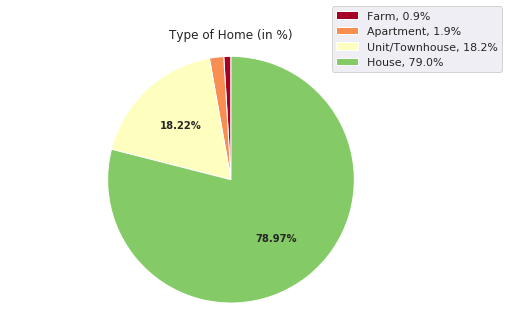

In [114]:
ndf_piechart1 = notsafe_subs['What type of home do you live in?'].value_counts().sort_values()
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = ndf_piechart1.index
sizes = ndf_piechart1.values
NUM_COLORS = len(sizes)

fig1, ax1 = plt.subplots(figsize=(6, 5))

#theme = plt.get_cmap('YlGn')
theme = plt.get_cmap('RdYlGn')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.85, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Type of Home (in %)")

### Type of Doors

Text(0.5, 1.0, 'Type of External Doors (in %)')

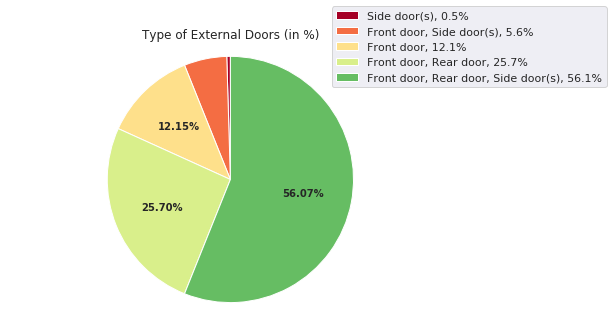

In [115]:
ndf_piechart2 = notsafe_subs['Which of the following external doors does your home have?'].value_counts().sort_values()
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = ndf_piechart2.index
sizes = ndf_piechart2.values
NUM_COLORS = len(sizes)

fig1, ax1 = plt.subplots(figsize=(6, 5))

#theme = plt.get_cmap('YlGn')
theme = plt.get_cmap('RdYlGn')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.85, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Type of External Doors (in %)")

### Type of Fences

Text(0.5, 1.0, 'Fences in the House(in %)')

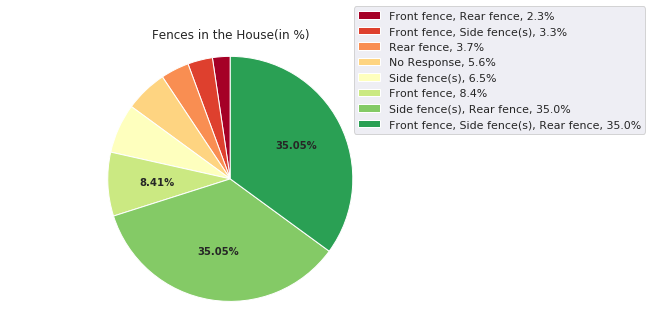

In [116]:
ndf_piechart3 = notsafe_subs['What fences does your property have?'].value_counts().sort_values()
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = ndf_piechart3.index
sizes = ndf_piechart3.values
NUM_COLORS = len(sizes)

fig1, ax1 = plt.subplots(figsize=(6, 5))

#theme = plt.get_cmap('YlGn')
theme = plt.get_cmap('RdYlGn')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.9, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Fences in the House(in %)")

### Security alarms at home

Text(0.5, 1.0, 'Does your home have any\n security systems? (in %)')

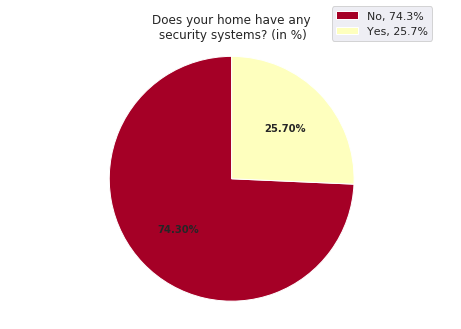

In [117]:
ndf_piechart5 = notsafe_subs['Security camera faces entry'].value_counts().sort_index()
def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = ndf_piechart5.index
sizes = ndf_piechart5.values
NUM_COLORS = len(sizes)

fig1, ax1 = plt.subplots(figsize=(6, 5))

#theme = plt.get_cmap('YlGn')
theme = plt.get_cmap('RdYlGn')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(
    sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.85, 1),
    bbox_transform=fig1.transFigure
)

plt.title("Does your home have any\n security systems? (in %)")

### House security measures

In [118]:
doorslockedn = notsafe_subs['I keep all my doors and windows locked when I’m at home or in my yard'].value_counts().sort_index()
doorslockedpercn = np.true_divide(doorslockedn.values, doorslockedn.sum())*100
doorslockedpercn

array([38.31775701, 61.68224299])

In [119]:
computersn =notsafe_subs['Computers, televisions and other electronics not visible from outside'].value_counts().sort_index()
computerspercn =np.true_divide(computersn.values, computersn.sum())*100
computerspercn

array([34.11214953, 65.88785047])

In [120]:
doorseenn = notsafe_subs['Front door and entry can be seen from street'].value_counts().sort_index()
doorseenpercn =np.true_divide(doorseenn.values, doorseenn.sum())*100
doorseenpercn

array([30.37383178, 69.62616822])

In [121]:
housenumn = notsafe_subs['House number is clearly displayed'].value_counts().sort_index()
housenumpercn =np.true_divide(housenumn.values, housenumn.sum())*100
housenumpercn

array([11.68224299, 88.31775701])

In [122]:
housenumvisn =notsafe_subs['House number is visible at night'].value_counts().sort_index()
housenumvisn = housenumvisn.iloc[[0,2],]

In [123]:
#housenumvisn = notsafe_subs['House number is visible at night'].value_counts().sort_index()
housenumvispercn =np.true_divide(housenumvisn.values, housenumvisn.sum())*100
housenumvispercn

array([49.76525822, 50.23474178])

In [124]:
gardn = notsafe_subs['Garden kept short and neat'].value_counts().sort_index()
gardpercn =np.true_divide(gardn.values, gardn.sum())*100
gardpercn

array([30.37383178, 69.62616822])

In [125]:
cameran= notsafe_subs['Security camera faces entry'].value_counts().sort_index()
campercn = np.true_divide(cameran.values, cameran.sum())*100
campercn

array([74.29906542, 25.70093458])

In [126]:
dogn= notsafe_subs['I have a dog'].value_counts().sort_index()
dogpercn = np.true_divide(dogn.values, dogn.sum())*100
dogpercn

array([70.56074766, 29.43925234])

In [127]:
sensorlightn= notsafe_subs['I have sensor lighting or timed lighting in my house for when I’m not at home'].value_counts().sort_index()
sensorlightpercn = np.true_divide(sensorlightn.values, sensorlightn.sum())*100
sensorlightpercn

array([39.71962617, 60.28037383])

In [128]:
valuen= notsafe_subs['Valuables kept in a secured, locked safe located out of sight.'].value_counts().sort_index()
valuepercn = np.true_divide(valuen.values, valuen.sum())*100
valuepercn

array([60.28037383, 39.71962617])

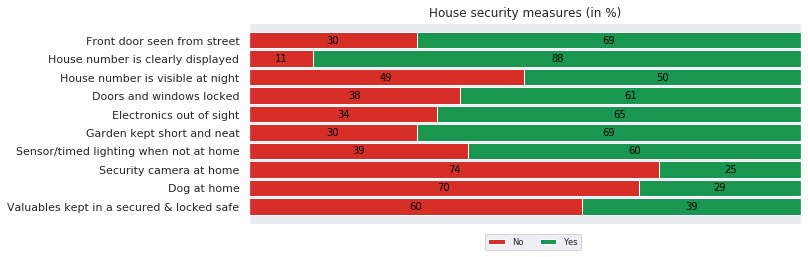

In [129]:
col_names = ["No",'Yes'] 
results = { 'Front door seen from street': doorseenpercn,
           'House number is clearly displayed': housenumpercn,
           'House number is visible at night': housenumvispercn,
           "Doors and windows locked": doorslockedpercn,
           'Electronics out of sight': computerspercn,
          'Garden kept short and neat': gardpercn,
           'Sensor/timed lighting when not at home': sensorlightpercn,
           'Security camera at home': campercn,
           'Dog at home': dogpercn,
           'Valuables kept in a secured & locked safe': valuepercn}
def survey(results, col_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.1, 0.90, data.shape[1]))
    fig, ax = plt.subplots(figsize=(9.9, 3.7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())
    for i, (colname, color) in enumerate(zip(col_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.9, label=colname, color=color)
        xcenters = starts + widths / 2
        r, g, b, _ = color
        text_color = 'black' 
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(col_names), bbox_to_anchor=(0.42, -0.15),
              loc='lower left', fontsize='small')
    return fig, ax
     
survey(results, col_names) 
plt.title("House security measures (in %)")

fig.tight_layout()
plt.show()
fig.savefig('plot5.pdf')